In [1]:
#Se hará con Movimiento Browniano Geometrico
#Es la ecuacion diferencial estocastica
# dS/S = µdt + sigmadWt
#con Wt un proceso de Wiener N(0, sigma^2 = t)

In [2]:
 #Importamos paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

from scipy import stats
%matplotlib inline

#se usará yfinance para descargar los datos de las acciones de yahoo finance
import yfinance as yf

#otros paquetes de ser necesario
import statistics
    

In [3]:
#Descarguemos el historial de la accion
aapl = yf.Ticker("AAPL")
actual_hist = aapl.history(start="2019-12-29", end="2020-12-30", auto_adjust=False)

#vemos si los imports funcionan revisando algunos valores
print(actual_hist.iloc[[0,-1]])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-12-30   72.364998   73.172501   71.305000   72.879997   71.813278   
2020-12-29  138.050003  138.789993  134.339996  134.869995  134.043655   

               Volume  Dividends  Stock Splits  
Date                                            
2019-12-30  144114400        0.0           0.0  
2020-12-29  121047300        0.0           0.0  


Text(0, 0.5, '$$$')

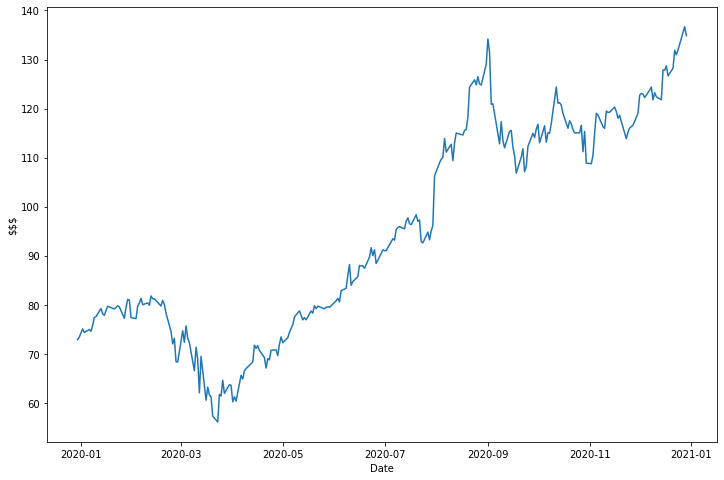

In [4]:
#revisemos el plot del historial de la acción
fig = plt.figure(figsize=(12,8))
plt.plot(actual_hist['Close'])
plt.xlabel('Date')
plt.ylabel('$$$')

In [5]:
#Movimiento Browniano y Monte Carlo SIUUUU

#Cuantos "pasos" hay en la simulacion, para cuantos dias (1 paso = 1 dia)
n_t = len(actual_hist)
print("Numero de dias: ", n_t)

#Numero de simulaciones a realizar
#Posibles direcciones que tomará la accion en ese periood de tiempo
n_mc = 10000

#inicializa el data frame donde se guardan las simulaciones de monte carlo
St = pd.DataFrame(0., index=actual_hist.index, columns=list(range(1,n_mc+1)))
#primer valor para todas las simulaciones es el valor de cierre del ultimo dia de 2017
St.iloc[0] = actual_hist['Close'].iloc[0] #dia 0

#Ahora veamos la volatilidad (Anualizada)
# Duda volatilidad anualizada de AMAZON
#sigma 1 es asumida
sigma1 = 0.25 
sigma2 = 0.2298
print(sigma2)

#drift (avg growth of stocks) bussiness cycle, long term assumption
#usar risk free rate (black schultz)
#mu1 se asume
mu1 = 0.08
mu2 = 0.02 #risk free rate de EEUU
mu3 = 0.068 #risk free en mex

#convertir tamaño de paso de 1 dia a terminos de años
#son dos años de info entonces se hace:
dt = 2./(n_t - 1)
#imprimimos la volatilidad diaria
print("Volatilidad diaria: ", sigma2*np.sqrt(dt))


Numero de dias:  253
0.2298
Volatilidad diaria:  0.02047221113049171


In [6]:
#Simulaciones de Monte Carlo utilizando valores aleatorios de numpy

for i in range(1, n_t):
    dS_2_S = mu3*dt + sigma2*np.sqrt(dt)*np.random.randn(n_mc)
    St.iloc[i] = St.iloc[i-1] + St.iloc[i-1]*dS_2_S

Count: 10000
Maximo:  328.3978993198511
Minimo:  22.42303119063667
IQR:  35.12765213345034
Media: 83.54379609529929
Desv Est:  27.88260959927686
Mediana: 79.36891146188889


(array([1.089e+03, 4.561e+03, 3.048e+03, 9.880e+02, 2.450e+02, 4.800e+01,
        1.400e+01, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([ 22.42303119,  53.020518  ,  83.61800482, 114.21549163,
        144.81297844, 175.41046526, 206.00795207, 236.60543888,
        267.20292569, 297.80041251, 328.39789932]),
 <BarContainer object of 10 artists>)

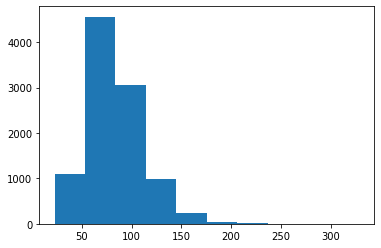

In [7]:
#Summary Statistics del último dia
print("Count:", len(St.iloc[252]))
print("Maximo: ",np.max(St.iloc[252]))
print("Minimo: ", np.min(St.iloc[252]))
print("IQR: ", sp.stats.iqr(St.iloc[252]))
print("Media:", np.mean(St.iloc[252]))
print("Desv Est: ", np.std(St.iloc[252]))
print("Mediana:", np.median(St.iloc[252]))
#grafiquemos
plt.hist(St.iloc[252])


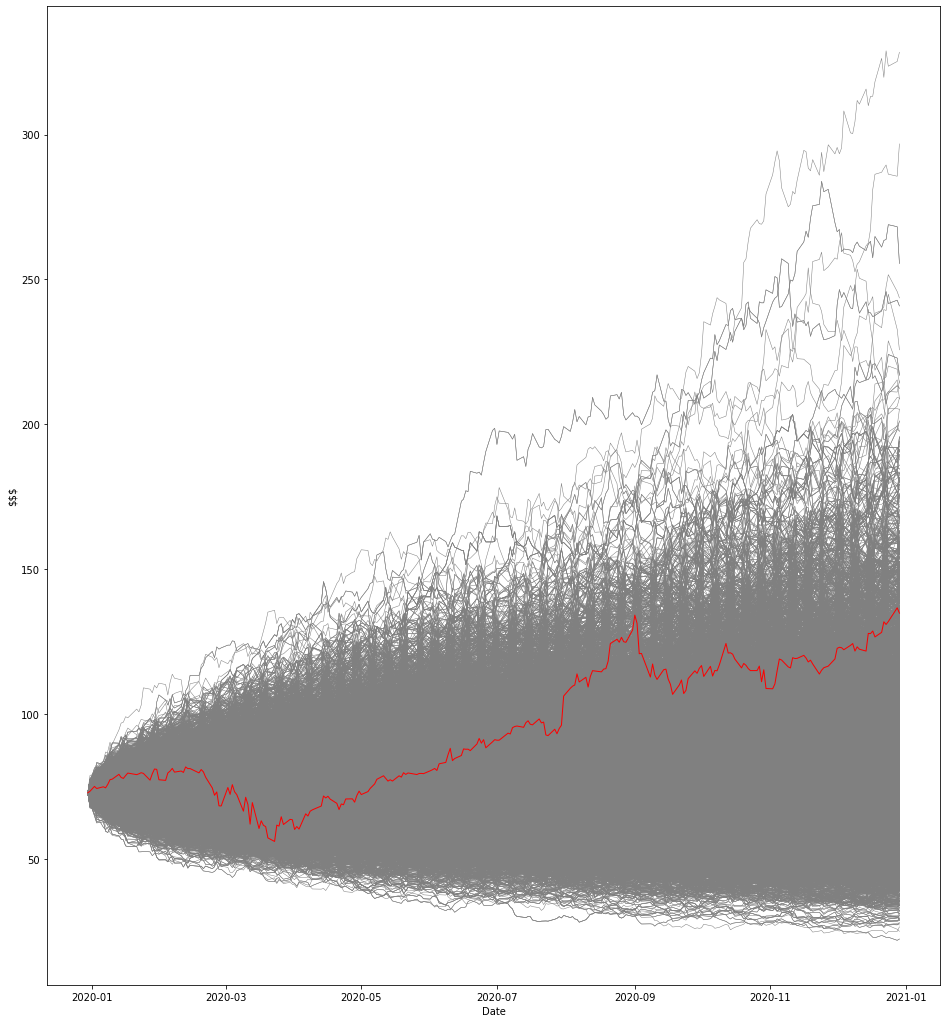

In [8]:
#visualizemos lo creado
fig = plt.figure(figsize=(16,18))
axl = fig.add_subplot(111)

#cambiar tamaño para ver cuantas sims deseamos mostrar
for i in np.random.choice(np.array(range(1, n_mc+1)), size = 10000):
    axl.plot(St[i], 'grey', lw=0.5)
    #print(St[i])

axl.plot(actual_hist['Close'], 'r', lw=1)
plt.xlabel('Date')
plt.ylabel('$$$')
plt.show()


In [17]:
#Comparemos Aproximaciones de MC con Valores teoricos
#Mean from monte carlo
St_mc_mean = St.mean(axis=1)
#Theoretical Mean
St_th_mean = actual_hist['Close'].iloc[0]*np.exp(mu3*np.arange(n_t)/n_t*2.)
#convertir el teorico en un data frame
St_th_mean = pd.DataFrame(St_th_mean, index = St_mc_mean.index)

#revisemos que jala imprimiendo los utlimos means de MC y Teoria
print("Expected Value from MC: ", St_mc_mean.iloc[-1])
print("Expected Value Theoretical: ", St_th_mean.iloc[-1])


#duda de error absoluto
for i in range(1,n_t):
    (St_mc_mean.iloc[i]-St_th_mean.iloc[i])


Expected Value from MC:  83.31717568886863
Expected Value Theoretical:  0    83.452421
Name: 2020-12-29 00:00:00, dtype: float64


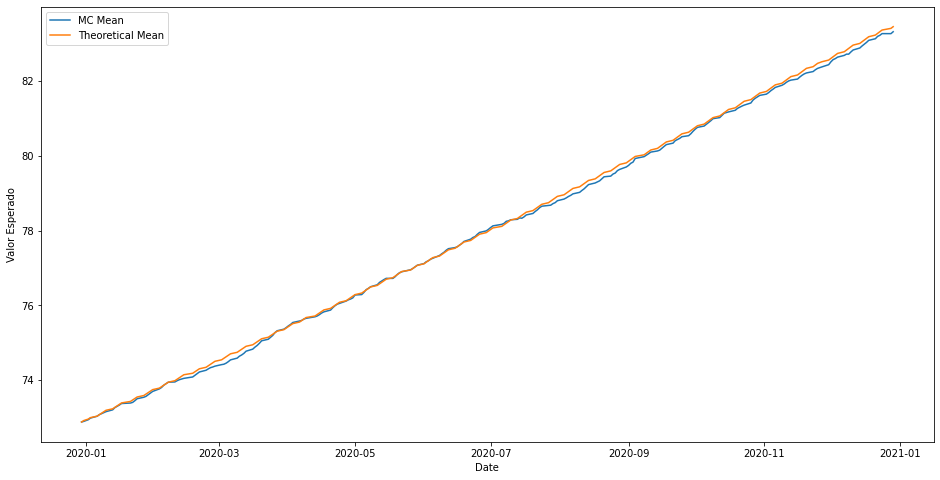

In [18]:
#Grafiquemos la media como una funcion del tiempo
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot(111)
plt.plot(St_mc_mean)
plt.plot(St_th_mean)
plt.xlabel('Date')
plt.ylabel('Valor Esperado')
plt.legend(['MC Mean', 'Theoretical Mean'])


In [ ]:
#Ahora para la mediana

